In [1]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import os

In [12]:
file1 = xr.open_dataset('/Users/weiyangbao/Documents/Model_outputs/drag_015/state_007.nc')
file2 = xr.open_dataset('/Users/weiyangbao/Documents/Model_outputs/drag_015/kpp_state_007.nc')

t0 = 60 # Start from day 30
tn = len(file1.T) # End day
state1 = file1.isel(Y = range(1,10), T = range(t0,tn)) # Remove the boundary walls in y direction
state2 = file2.isel(Y = range(1,10), T = range(t0-1,tn-1)) # Remove the boundary walls in y direction


In [202]:
Hs = 15
Qf = 700

X = state1.X.data
x_dist = X / 1000
depth = state1.Z.data
Az = state2.KPPviscAz.data.mean(axis=(0,2)) # Time-average and Y-average vertical eddy viscosity
u0 = state1.U.data # dims = T, Z, Y, Xp1
u_ymean = (u0[:, :, :, 1:].mean(2) + u0[:, :, :, :-1].mean(2)) / 2
u = u_ymean.mean(0) # dims = Z, X
u[u==0] = np.nan
#u_x = np.gradient(u, X, axis=1)
#u_z = np.gradient(u, depth, axis=0)
#vis = np.gradient(Az*u_z, depth, axis=0)
u_x = np.diff(u, axis=1, prepend=0) / 200
u_z = np.diff(u, axis=0, prepend=0)
dz = np.tile(np.diff(-depth,prepend=0),(50,1)).T

vis = np.diff(Az*(u_z/dz), axis=0, prepend=0) / dz
adv = u * u_x
R = abs(vis/adv)

R[R>1] = 1

/Users/weiyangbao/miniconda3/envs/py37/lib/python3.7/site-packages/ipykernel_launcher.py:23: RuntimeWarning: invalid value encountered in greater


Text(0, 0.5, 'Depth (m)')

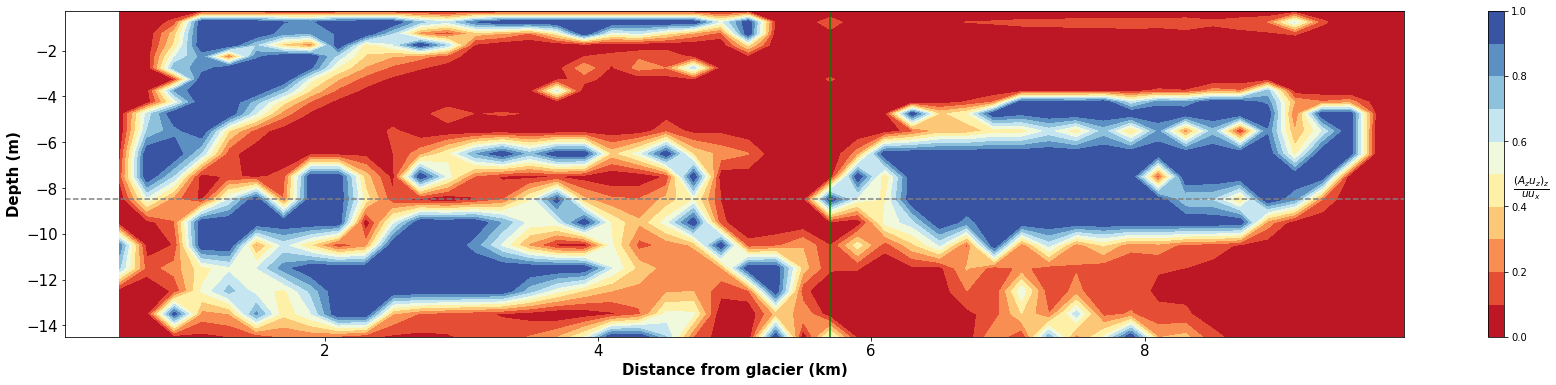

In [229]:
fig_path = "/Users/weiyangbao/Documents/Jupyter_Figs/Sill012/Vis_Adv/"
#fig_path = "/home/1959/Jupyter_Figs/sill30/FrPseries/"
if not os.path.exists(fig_path):
    os.makedirs(fig_path)

fig, ax = plt.subplots(figsize=(30,6)) 
#ca = np.linspace(-2.6e-4,2.4e-4,40) # Contour range for advection
ca = np.linspace(0,1,11)
# Plot advection field
plt.contourf(x_dist,depth[:20], R[:20,:], ca, cmap='RdYlBu')
ax.axvline(x_dist[28],color='g')
ax.axhline(y=depth[13],color='gray', linestyle='--')

import matplotlib.ticker
class OOMFormatter(matplotlib.ticker.ScalarFormatter):
    def __init__(self, order=0, fformat="%1.1f", offset=True, mathText=True):
        self.oom = order
        self.fformat = fformat
        matplotlib.ticker.ScalarFormatter.__init__(self,useOffset=offset,useMathText=mathText)
    def _set_orderOfMagnitude(self, nothing):
        self.orderOfMagnitude = self.oom
    def _set_format(self, vmin, vmax):
        self.format = self.fformat
        if self._useMathText:
            self.format = '$%s$' % matplotlib.ticker._mathdefault(self.format)
#cbar = plt.colorbar(ticks=np.linspace(0,1000,5))
#cbar = plt.colorbar(ticks=np.linspace(-2.6e-4,2.4e-4,5), format=OOMFormatter(-4, mathText=True))
#cbar.ax.tick_params(labelsize=12)
cbar = plt.colorbar()
cbar.set_label(r'$\frac{(A_zu_z)_z}{uu_x}$', size=15, weight='bold', rotation=0)

plt.yticks(fontsize = 15)
plt.xticks(fontsize = 15)
ax.set_xlabel('Distance from glacier (km)', size = 15, weight = 'bold')
ax.set_ylabel('Depth (m)', size = 15, weight = 'bold')

#fig.savefig(fig_path + '/Qf' + str(Qf) + '.png', dpi = 150, bbox_inches='tight')

In [45]:
x = np.array([[1, 3, 6, 10], [0, 5, 6, 8]])
np.diff(x, axis=0,prepend=0)

array([[ 1,  3,  6, 10],
       [-1,  2,  0, -2]])